1990-01-13 00:00:00
1990-01-13 00:00:00


C:\Users\admin\AppData\Local\Temp\ipykernel_14716\2022007919.py:26: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  parsed_date = pd.to_datetime(date_str, format=None, errors='coerce')


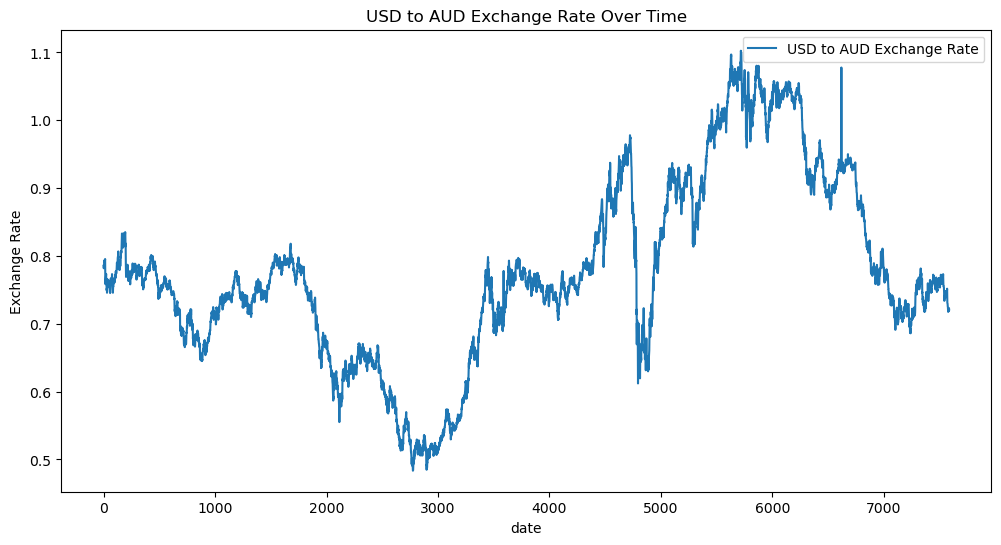

C:\Users\admin\AppData\Local\Temp\ipykernel_14716\2022007919.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ex_rate'].fillna(method='ffill', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14716\2022007919.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'].fillna(method='ffill', inplace=True)


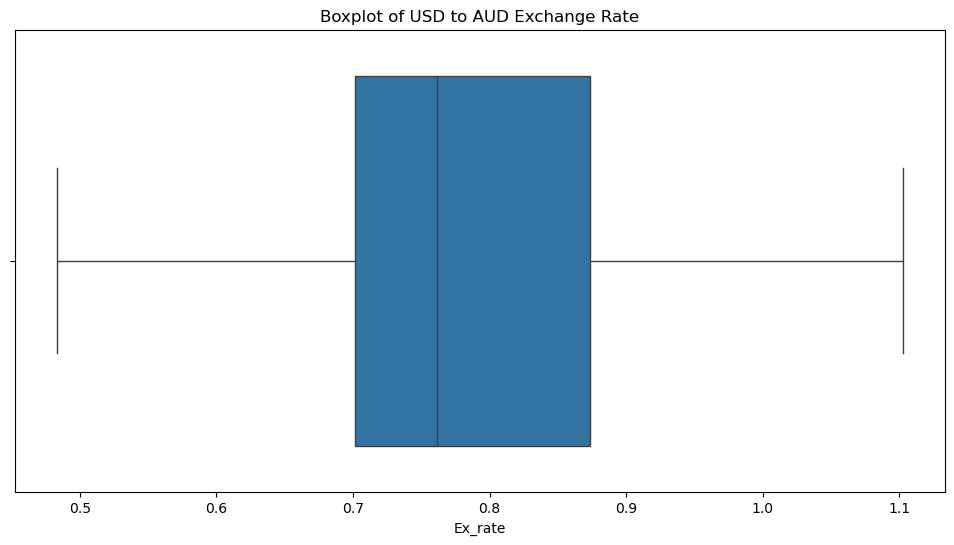

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974


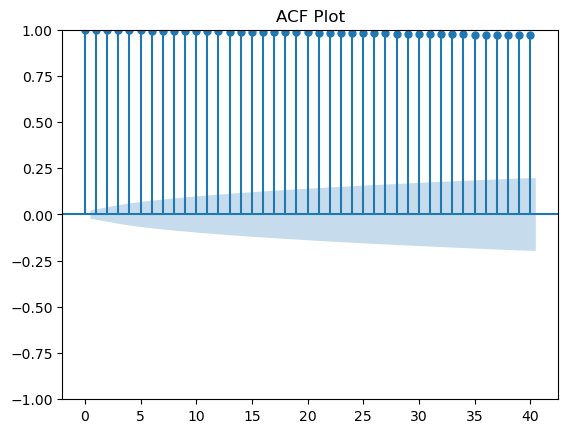

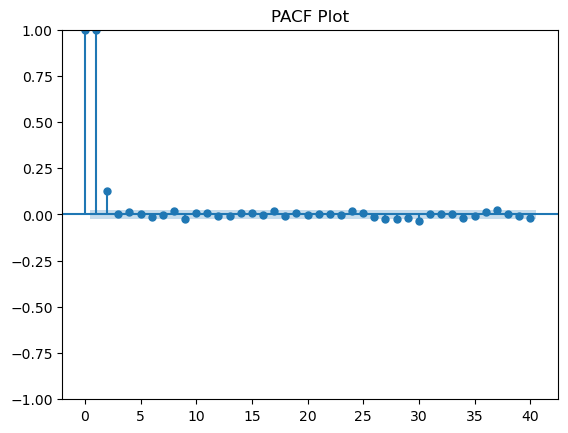

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 19 Jan 2025   AIC                         -56102.322
Time:                        08:35:23   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

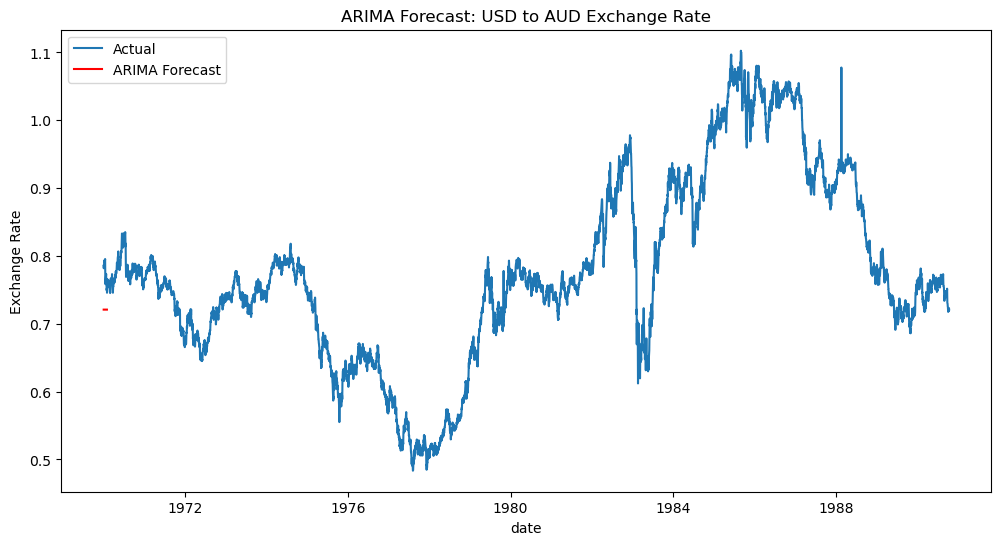

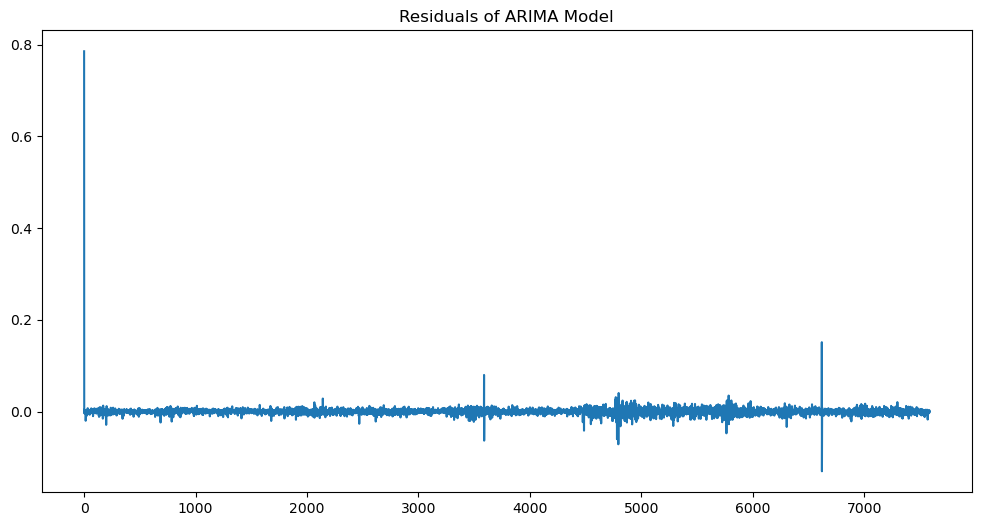

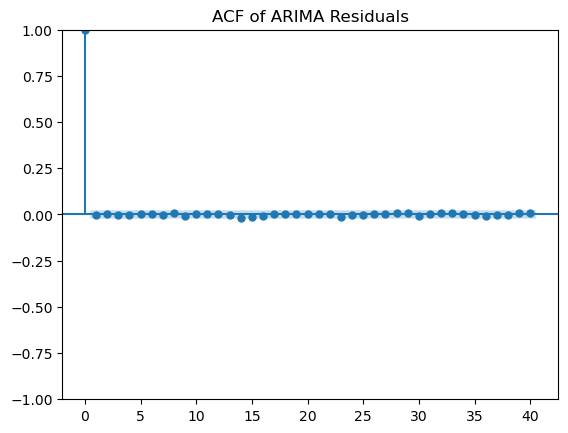

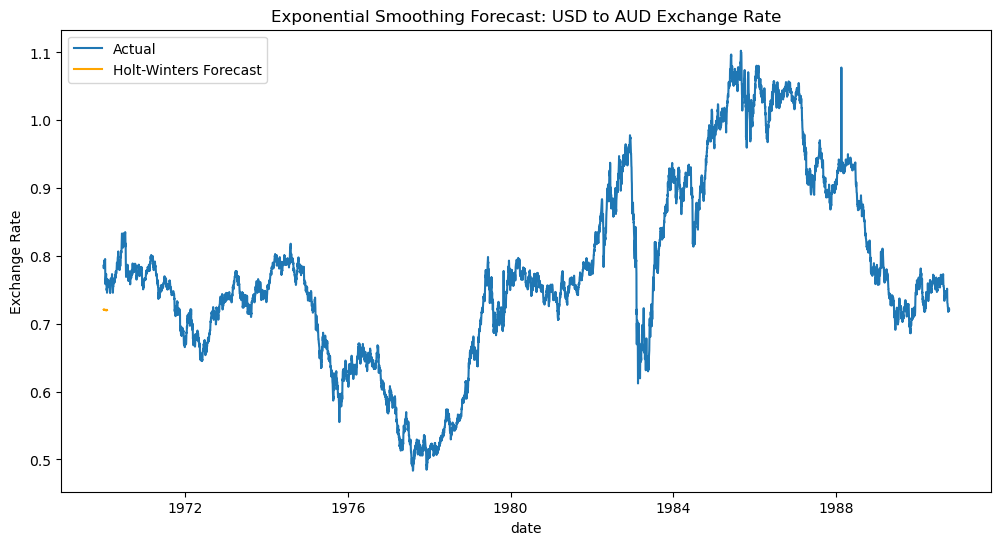

ARIMA MAE: 0.0127, RMSE: 0.0170, MAPE: nan%
Holt-Winters MAE: 0.0130, RMSE: 0.0172, MAPE: nan%
ARIMA performed better based on MAE.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\Timeseries\Timeseries\exchange_rate.csv")


from datetime import datetime

date_str = "13-01-1990 00:00"
parsed_date = datetime.strptime(date_str, "%d-%m-%Y %H:%M")
print(parsed_date)


import pandas as pd

date_str = "13-01-1990 00:00"
parsed_date = pd.to_datetime(date_str, format=None, errors='coerce')
print(parsed_date)


# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Handle missing values
df['Ex_rate'].fillna(method='ffill', inplace=True)

# Check for outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Ex_rate'])
plt.title('Boxplot of USD to AUD Exchange Rate')
plt.show()

# Stationarity test
result = adfuller(df['Ex_rate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# ACF and PACF plots
plot_acf(df['Ex_rate'], lags=40)
plt.title('ACF Plot')
plt.show()

plot_pacf(df['Ex_rate'], lags=40)
plt.title('PACF Plot')
plt.show()

# ARIMA Model
model_arima = ARIMA(df['Ex_rate'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Forecasting with ARIMA
forecast_arima = model_arima_fit.forecast(steps=30)
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(future_dates, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast: USD to AUD Exchange Rate')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Residual analysis
residuals = model_arima_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

plot_acf(residuals, lags=40)
plt.title('ACF of ARIMA Residuals')
plt.show()

# Holt-Winters Model
model_hw = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_hw_fit = model_hw.fit()

# Forecasting with Holt-Winters
forecast_hw = model_hw_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(future_dates, forecast_hw, label='Holt-Winters Forecast', color='orange')
plt.title('Exponential Smoothing Forecast: USD to AUD Exchange Rate')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics
actual_values = df['Ex_rate'][-30:]
mae_arima = mean_absolute_error(actual_values, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast_arima))
mape_arima = np.mean(np.abs((actual_values - forecast_arima) / actual_values)) * 100

mae_hw = mean_absolute_error(actual_values, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(actual_values, forecast_hw))
mape_hw = np.mean(np.abs((actual_values - forecast_hw) / actual_values)) * 100

print(f'ARIMA MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.4f}%')
print(f'Holt-Winters MAE: {mae_hw:.4f}, RMSE: {rmse_hw:.4f}, MAPE: {mape_hw:.4f}%')

if mae_arima < mae_hw:
    print("ARIMA performed better based on MAE.")
else:
    print("Holt-Winters performed better based on MAE.")


In [8]:
df = pd.read_csv(r"C:\Users\admin\Downloads\Timeseries\Timeseries\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [4]:
# Step 1: Data Loading
data = pd.read_csv(r'C:\Users\admin\Downloads\Timeseries\Timeseries\exchange_rate.csv', parse_dates=['date'], index_col='date')
print(data.info())  # Check data structure

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None


<Figure size 1000x600 with 0 Axes>

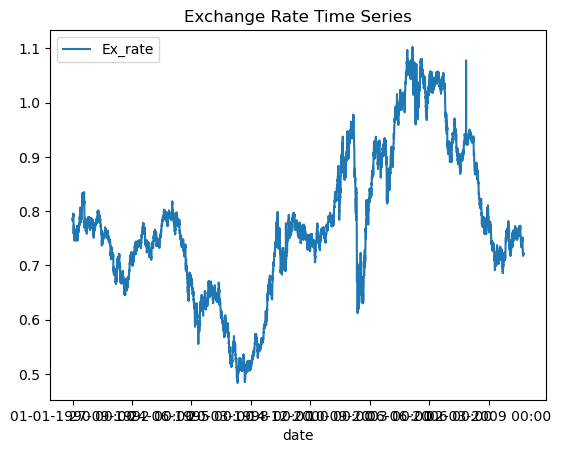

In [11]:
# Step 2: Initial Exploration
plt.figure(figsize=(10, 6))
data.plot(title='Exchange Rate Time Series', legend=True)
plt.show()

In [5]:
# Step 3: Data Preprocessing
# Handle missing values with interpolation
data = data.interpolate(method='linear')  # Use linear interpolation instead of 'time'
print(data.isnull().sum()) 

Ex_rate    0
dtype: int64
